In [1]:
# Server listening ready to receive the photo taken by Nao

import socket

server = socket.socket(socket.AF_INET, socket.SOCK_STREAM)  # AF_INET = IP, SOCK_STREAM = TCP
server.bind(('127.0.0.1', 10000))
server.listen()   # Server listening

client, addr = server.accept()

file = open('photo_received.png', "wb")
image = client.recv(2048)  # Stream-based protocol

while image: # Server listening, until the image arrives
    file.write(image)
    image = client.recv(2048)  # The image coming from the client

file.close()
client.close()

# The client will disconnect from the server

In [ ]:
!pip install rmn==3.0.0   # The library is installed

ERROR: Invalid requirement: '#'


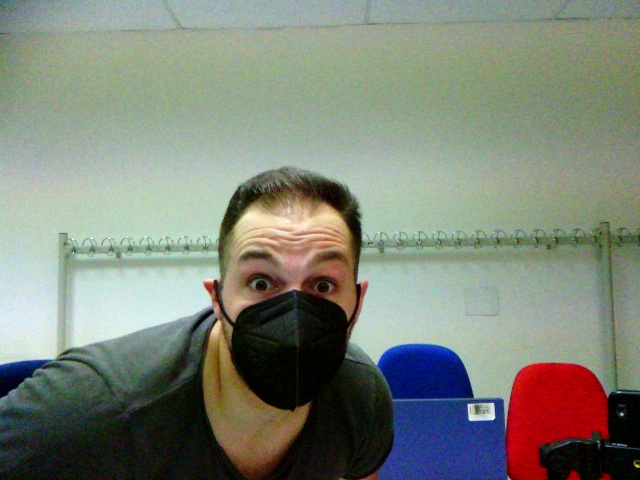

In [3]:
from IPython.display import Image   # The image arrived from the client is imported
Image('photo_received', width=400)

In [4]:
import cv2 
from rmn import RMN   # Import the "Residual Masking Network"

m = RMN()

In [5]:
image = cv2.imread("photo_received.png")   # Face detection and recognition are performed to determine emotion
assert image is not None
results = m.detect_emotion_for_single_frame(image)

print(results)   # A list with various info and the result is printed

num faces: 1
[{'xmin': 206, 'ymin': 208, 'xmax': 373, 'ymax': 375, 'emo_label': 'surprise', 'emo_proba': 0.9095576405525208, 'proba_list': [{'angry': 0.007663908414542675}, {'disgust': 0.0011209964286535978}, {'fear': 0.07539363205432892}, {'happy': 0.0005765242967754602}, {'sad': 0.0013319107238203287}, {'surprise': 0.9095576405525208}, {'neutral': 0.004355423152446747}]}]


In [6]:
# Result of the recognition

print("Emotion:",list(results[0].values())[4])

recognition_result=list(results[0].values())[4]

print(recognition_result)

# Display the dictionary as a list, select the value of the "emo_label" key
# Which corresponds to the index [4]

Emozione: surprise
surprise


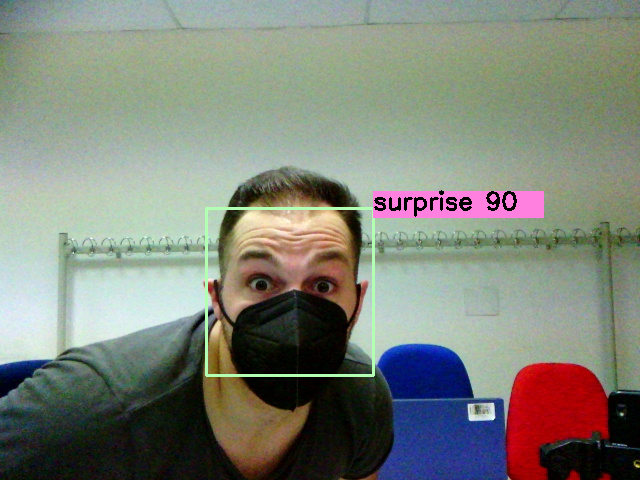

In [7]:
# To get more feedback on recognition,
# the frame that surrounds the face is produced, with the emotion extracted

image = m.draw(image, results)
cv2.imwrite("photo_with_recognition.png", image)

Image("photo_with_recognition.png", width=400)

In [8]:
# Send result to client

import socket

server = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
server.bind(('127.0.0.1', 22222))   # port: 22222
server.listen(1)   # Allows a maximum of one socket connection
client, addr = server.accept()   # Will wait for the client to accept the connection

msg = recognition_result

client.send(msg.encode())

client.close()   # It will disconnect from the server